In [ ]:
import os,shutil

**Importing the dataset from Kaggle**

In [ ]:
os.environ['KAGGLE_USERNAME']='rohanazad'
os.environ['KAGGLE_KEY']='d0a962062a00f47118aa4ff25a01ade3'

In [ ]:
!kaggle competitions download -c ashrae-energy-prediction

 87% 145M/167M [00:05<00:01, 18.7MB/s]
100% 167M/167M [00:05<00:00, 32.8MB/s]
 92% 81.0M/88.4M [00:02<00:00, 35.5MB/s]
100% 88.4M/88.4M [00:02<00:00, 36.8MB/s]
  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 49.9MB/s]
 94% 113M/120M [00:03<00:00, 31.5MB/s]
100% 120M/120M [00:03<00:00, 34.2MB/s]
  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 82.3MB/s]
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 172MB/s]


In [ ]:
import pandas as pd

In [ ]:
import zipfile

unzipped_train=zipfile.ZipFile('train.csv.zip')
unzipped_train.extractall()
unzipped_train.close()

unzipped_test=zipfile.ZipFile('test.csv.zip')
unzipped_test.extractall()
unzipped_test.close()

In [ ]:
unzipped_weather_train=zipfile.ZipFile('weather_train.csv.zip')
unzipped_weather_train.extractall()
unzipped_weather_train.close()

unzipped_weather_test=zipfile.ZipFile('weather_test.csv.zip')
unzipped_weather_test.extractall()
unzipped_weather_test.close()

In [ ]:
weather_train=pd.read_csv('weather_train.csv')
weather_test=pd.read_csv('weather_test.csv')
building_met=pd.read_csv('building_metadata.csv')

In [ ]:
total=weather_train.isnull().sum().sort_values(ascending=False)
percent=(weather_train.isnull().sum()/weather_train.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

In [ ]:
total=building_met.isnull().sum().sort_values(ascending=False)
percent=(building_met.isnull().sum()/building_met.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

**Dataset directories**

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
weather_train_dir='/content/drive/My Drive/weather_train3.csv'
weather_train=pd.read_csv(weather_train_dir)
weather_test_dir='/content/drive/My Drive/weather_test2.csv'
weather_test=pd.read_csv(weather_test_dir)
building_met_dir='/content/drive/My Drive/building_metadata_save.csv'
building_met=pd.read_csv(building_met_dir)

In [ ]:
# total=train.isnull().sum().sort_values(ascending=False)
# percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
# missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
# missing_values.head(20)

In [ ]:
# train.head()

In [ ]:
print('shape of train:',train.shape)
print('shape of test:',test.shape)
print('shape of weather_train:',weather_train.shape)
print('shape of weather_test:',weather_test.shape)
print('shape of building_metadata:',building_met.shape)

shape of train: (20216100, 4)
shape of test: (41697600, 4)
shape of weather_train: (139788, 12)
shape of weather_test: (277243, 12)
shape of building_metadata: (1449, 6)


**timestamp stores data as strings in a particular format. Year,month,day,time**

**Apply to_datetime to convert string to object**

In [ ]:
train['timestamp']=pd.to_datetime(train['timestamp'])
test['timestamp']=pd.to_datetime(test['timestamp'])
weather_train['timestamp']=pd.to_datetime(weather_train['timestamp'])
weather_test['timestamp']=pd.to_datetime(weather_test['timestamp'])

building_met['primary_use']=building_met['primary_use'].astype('category')

**Merging the three dataset to create train set**

In [ ]:
temp=train[['building_id']]
temp=temp.merge(building_met,on='building_id',how='left')
del temp['building_id']
train=pd.concat([train,temp],axis=1)



In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,4
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,4
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,4
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,4
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,4


In [ ]:
temp=train[['site_id','timestamp']]
temp=temp.merge(weather_train,on=['site_id','timestamp'],how='left')
del temp['site_id'],temp['timestamp']
train=pd.concat([train,temp],axis=1)

del temp,weather_train

In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day_date,year
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0


In [ ]:
train.shape

(20216100, 19)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int64         
 1   meter               int64         
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         category      
 6   square_feet         int64         
 7   year_built          float64       
 8   floor_count         int64         
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
 16  Month               float64       
 17  Day_date            float64       
 18  year                float64       
dtypes: category(1), datetime64[ns](1), float

**Creating Hour column**

In [ ]:
import numpy as np

train['hour_datetime']=train['timestamp'].dt.hour.astype(np.int8)

del train['timestamp']

In [ ]:
train.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day_date,year,hour_datetime
0,0,0,0.0,0,Education,7432,2008.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0
1,1,0,0.0,0,Education,2720,2004.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0
2,2,0,0.0,0,Education,5376,1991.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0
3,3,0,0.0,0,Education,23685,2002.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0
4,4,0,0.0,0,Education,116607,1975.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0


**Looking for missing values**

In [ ]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=0,keys=['total','percent'])
missing_values.head(20)

,total,percent
cloud_coverage,82890,0.0041
Day_date,82890,0.0041
Month,82890,0.0041
wind_speed,82890,0.0041
wind_direction,82890,0.0041
sea_level_pressure,82890,0.0041
precip_depth_1_hr,82890,0.0041
dew_temperature,82890,0.0041
year,82890,0.0041
air_temperature,82890,0.0041


In [ ]:
train=train.dropna()

In [ ]:
train.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day_date,year,hour_datetime
count,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,20133210.0,2.013321e+07
mean,7.974179e+02,6.617699e-01,2.124405e+03,7.970224e+00,1.077780e+05,1.969521e+03,4.030442e+00,1.593926e+01,1.787219e+00,1.787219e+00,1.144656e+00,9.767713e+02,1.708236e+02,3.377249e+00,6.566733e+00,1.578433e+01,2016.0,1.150934e+01
std,4.264339e+02,9.310602e-01,1.535506e+05,5.092977e+00,1.171483e+05,2.014374e+01,1.665084e+00,1.098146e+01,2.003313e+00,2.003313e+00,6.979683e+00,1.961202e+02,1.107229e+02,2.261500e+00,3.441398e+00,8.802123e+00,0.0,6.923804e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.890000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2016.0,0.000000e+00
25%,3.910000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1.964000e+03,4.000000e+00,8.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011100e+03,8.000000e+01,2.100000e+00,4.000000e+00,8.000000e+00,2016.0,6.000000e+00
50%,8.940000e+02,0.000000e+00,7.875000e+01,9.000000e+00,7.270900e+04,1.975000e+03,4.000000e+00,1.670000e+01,1.109988e+00,1.109988e+00,0.000000e+00,1.015895e+03,1.700000e+02,3.100000e+00,7.000000e+00,1.600000e+01,2016.0,1.200000e+01
75%,1.176000e+03,1.000000e+00,2.679400e+02,1.300000e+01,1.391130e+05,1.975054e+03,4.000000e+00,2.390000e+01,2.873133e+00,2.873133e+00,0.000000e+00,1.020200e+03,2.700000e+02,4.600000e+00,1.000000e+01,2.300000e+01,2016.0,1.800000e+01
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.720000e+01,9.000000e+00,9.000000e+00,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01,1.200000e+01,3.100000e+01,2016.0,2.300000e+01


In [ ]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

,total,percent
hour_datetime,0,0.0
air_temperature,0,0.0
meter,0,0.0
meter_reading,0,0.0
site_id,0,0.0
primary_use,0,0.0
square_feet,0,0.0
year_built,0,0.0
floor_count,0,0.0
cloud_coverage,0,0.0


**Before applying pipeline transformation, chilled water dataset has been separated**

In [ ]:
dataset_chilled_water=train.loc[(train['meter']==1)]

In [ ]:
dataset_chilled_water.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day_date,year,hour_datetime
172,161,1,0.0000,2,Education,11329,1954.388235,4,15.6,6.0,6.0,0.157738,1015.3,270.0,3.6,1.0,1.0,2016.0,0
174,162,1,0.0000,2,Education,98829,1968.000000,4,15.6,6.0,6.0,0.157738,1015.3,270.0,3.6,1.0,1.0,2016.0,0
176,163,1,4.5719,2,Education,72102,1970.000000,4,15.6,6.0,6.0,0.157738,1015.3,270.0,3.6,1.0,1.0,2016.0,0
181,166,1,209.8860,2,Lodging/residential,553210,2009.000000,4,15.6,6.0,6.0,0.157738,1015.3,270.0,3.6,1.0,1.0,2016.0,0
184,167,1,0.0000,2,Lodging/residential,86323,1956.000000,4,15.6,6.0,6.0,0.157738,1015.3,270.0,3.6,1.0,1.0,2016.0,0


In [ ]:
dataset_chilled_water.shape

(4161542, 19)

In [ ]:
drop_cols=['meter_reading']

In [ ]:
training_chilled_water=dataset_chilled_water.drop(drop_cols,axis=1)

In [ ]:
training_chilled_water.shape

(4161542, 18)

In [ ]:
training_chilled_water['primary_use'].count

<bound method Series.count of 172                   Education
174                   Education
176                   Education
181         Lodging/residential
184         Lodging/residential
                   ...         
20216039    Lodging/residential
20216042                 Office
20216044              Education
20216046    Lodging/residential
20216049    Lodging/residential
Name: primary_use, Length: 4161542, dtype: category
Categories (16, object): [Education, Entertainment/public assembly, Food sales and service,
                          Healthcare, ..., Services, Technology/science, Utility,
                          Warehouse/storage]>

In [ ]:
target_chilled_water=dataset_chilled_water['meter_reading']

In [ ]:
target_chilled_water.shape

(4161542,)

**Apply pipeline transformation to training_chilled_water**

In [ ]:
num_cols=['square_feet','floor_count','air_temperature',
                 'cloud_coverage','dew_temperature','precip_depth_1_hr',
                 'sea_level_pressure','wind_direction','wind_speed']
cat_cols=['primary_use']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs=list(num_cols)
cat_attribs=['primary_use']

num_pipeline=Pipeline([
    ('std_scaler',StandardScaler())
])

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

training_prepared=full_pipeline.fit_transform(training_chilled_water)
#('num',num_pipeline,num_attribs),

In [ ]:
x_train=training_prepared[:3329233]
x_val=training_prepared[3329233:]
y_train=target_chilled_water[:3329233]
y_val=target_chilled_water[3329233:]

In [ ]:
print('shape of x_train:',x_train.shape)
print('shape of x_val:',x_val.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_val:',y_val.shape)

shape of x_train: (3329233, 23)
shape of x_val: (832309, 23)
shape of y_train: (3329233,)
shape of y_val: (832309,)


**Working with test set**

In [ ]:
test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01
1,1,1,0,2017-01-01
2,2,2,0,2017-01-01
3,3,3,0,2017-01-01
4,4,4,0,2017-01-01


In [ ]:
test.shape

(41697600, 4)

In [ ]:
import pandas as pd

temp=test[['building_id']]
temp=temp.merge(building_met,on='building_id',how='left')
del temp['building_id']
test=pd.concat([test,temp],axis=1)

In [ ]:
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,2017-01-01,0,Education,7432,2008.0,4
1,1,1,0,2017-01-01,0,Education,2720,2004.0,4
2,2,2,0,2017-01-01,0,Education,5376,1991.0,4
3,3,3,0,2017-01-01,0,Education,23685,2002.0,4
4,4,4,0,2017-01-01,0,Education,116607,1975.0,4


In [ ]:
temp=test[['site_id','timestamp']]
temp=temp.merge(weather_test,on=['site_id','timestamp'],how='left')
del temp['timestamp'],temp['site_id']
test=pd.concat([test,temp],axis=1)

del temp,weather_test

In [ ]:
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day_date,year
0,0,0,0,2017-01-01,0,Education,7432,2008.0,4,17.8,4.0,4.0,1.169297,1021.4,100.0,3.6,1.0,1.0,2017.0
1,1,1,0,2017-01-01,0,Education,2720,2004.0,4,17.8,4.0,4.0,1.169297,1021.4,100.0,3.6,1.0,1.0,2017.0
2,2,2,0,2017-01-01,0,Education,5376,1991.0,4,17.8,4.0,4.0,1.169297,1021.4,100.0,3.6,1.0,1.0,2017.0
3,3,3,0,2017-01-01,0,Education,23685,2002.0,4,17.8,4.0,4.0,1.169297,1021.4,100.0,3.6,1.0,1.0,2017.0
4,4,4,0,2017-01-01,0,Education,116607,1975.0,4,17.8,4.0,4.0,1.169297,1021.4,100.0,3.6,1.0,1.0,2017.0


In [ ]:
import numpy as np

test['hour_datetime']=test['timestamp'].dt.hour.astype(np.int8)

del test['timestamp']

In [ ]:
total=test.isnull().sum().sort_values(ascending=False)
percent=(test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

,total,percent
cloud_coverage,199029,0.004773
Day_date,199029,0.004773
Month,199029,0.004773
wind_speed,199029,0.004773
wind_direction,199029,0.004773
sea_level_pressure,199029,0.004773
precip_depth_1_hr,199029,0.004773
dew_temperature,199029,0.004773
year,199029,0.004773
air_temperature,199029,0.004773


In [ ]:
test.describe()

,row_id,building_id,meter,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day_date,year,hour_datetime
count,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.149857e+07,4.169760e+07
mean,2.084880e+07,8.075824e+02,6.642857e-01,8.086134e+00,1.069469e+05,1.969393e+03,4.021008e+00,1.550734e+01,1.830514e+00,1.830514e+00,1.252654e+00,9.786402e+02,1.718198e+02,3.383756e+00,6.517360e+00,1.571009e+01,2.017500e+03,1.150000e+01
std,1.203706e+07,4.297680e+02,9.278067e-01,5.134712e+00,1.160888e+05,2.045075e+01,1.655263e+00,1.128247e+01,2.010436e+00,2.010436e+00,7.862236e+00,1.919029e+02,1.100916e+02,2.235641e+00,3.445343e+00,8.803499e+00,5.000000e-01,6.922187e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.810000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.017000e+03,0.000000e+00
25%,1.042440e+07,4.047500e+02,0.000000e+00,3.000000e+00,3.224350e+04,1.963000e+03,4.000000e+00,7.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010900e+03,8.000000e+01,2.100000e+00,4.000000e+00,8.000000e+00,2.017000e+03,5.750000e+00
50%,2.084880e+07,9.000000e+02,0.000000e+00,9.000000e+00,7.226250e+04,1.975000e+03,4.000000e+00,1.670000e+01,1.082078e+00,1.082078e+00,0.000000e+00,1.015900e+03,1.700000e+02,3.100000e+00,7.000000e+00,1.600000e+01,2.017000e+03,1.150000e+01
75%,3.127320e+07,1.194250e+03,1.000000e+00,1.300000e+01,1.383875e+05,1.975054e+03,4.000000e+00,2.390000e+01,2.730284e+00,2.730284e+00,0.000000e+00,1.020200e+03,2.700000e+02,4.600000e+00,1.000000e+01,2.300000e+01,2.018000e+03,1.725000e+01
max,4.169760e+07,1.448000e+03,3.000000e+00,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.830000e+01,9.000000e+00,9.000000e+00,5.970000e+02,1.050100e+03,3.600000e+02,2.420000e+01,1.200000e+01,3.100000e+01,2.018000e+03,2.300000e+01


In [ ]:
test_chilled_water= test.loc[(test['meter']==1)]

In [ ]:
test_chilled_water.shape

(8724960, 19)

In [ ]:
test_drop_cols=['row_id']

In [ ]:
testing=test_chilled_water.drop(test_drop_cols,axis=1)

In [ ]:
testing.shape

(8724960, 18)

In [ ]:
testing_prepared=full_pipeline.transform(testing)

In [ ]:
testing_prepared.shape

(8724960, 23)

**Learning rate**

In [ ]:
# m = x_train[:10000].shape[0]
# n = x_train[:10000].shape[1]

In [ ]:
# y_train = np.expand_dims(y_train, 1)

In [ ]:
# y_train.shape

(3329233, 1)

In [ ]:
# def ComputeCostMulti(x_train,y_train,theta):
#   h=x_train .dot (theta)
#   error= h-y_train
#   J = (1./(2*m)) * ((error.T) .dot (error))

In [ ]:
# def GradientDescentMulti(x_train,y_train, theta, eta, num_iters):
#   J_history=[]
#   for iter in range (1,201):
#     h= x_train.dot(theta)
#     error=h-y_train
#     theta_change = (2./m) * eta * (x_train.T .dot(error))
#     theta=theta-theta_change
#     cost_history=(1./(2*m)) * ((error.T) .dot (error))
#     J_history.append(cost_history)
#   return J_history


**learning rate =0.01**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.01
# history = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# print(history)

[array([[81356.12586108]]), array([[80471.50112982]]), array([[79666.32939595]]), array([[78932.68166858]]), array([[78263.44937697]]), array([[77652.25813153]]), array([[77093.39062281]]), array([[76581.71768597]]), array([[76112.63666171]]), array([[75682.01627768]]), array([[75286.1473568]]), array([[74921.69873333]]), array([[74585.67782323]]), array([[74275.39535453]]), array([[73988.433816]]), array([[73722.61922962]]), array([[73475.99589418]]), array([[73246.80378522]]), array([[73033.45832952]]), array([[72834.53230297]]), array([[72648.73962681]]), array([[72474.92086158]]), array([[72312.03021913]]), array([[72159.12393242]]), array([[72015.34983968]]), array([[71879.93805475]]), array([[71752.19260912]]), array([[71631.48396327]]), array([[71517.24229579]]), array([[71408.95148838]]), array([[71306.14373378]]), array([[71208.39470091]]), array([[71115.31919906]]), array([[71026.56728867]]), array([[70941.82079188]]), array([[70860.79016118]]), array([[70783.21166867]]), arr

In [ ]:
# history = np. array(history)
# history_reshape=np.reshape(history, (200,))

**Learning rate =0.003**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.003
# history_003 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_003 = np. array(history_003)
# history_003reshape=np.reshape(history_003, (200,))

**Learning rate =0.001**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.001
# history_001 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_001 = np. array(history_001)
# history_001reshape=np.reshape(history_001, (200,))

**Learning rate =0.03**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.03 
# history_03 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_03 = np. array(history_03)
# history_03reshape=np.reshape(history_03, (200,))

**Learning rate = 0.3**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.3
# history_3 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_3 = np. array(history_3)
# history_3reshape=np.reshape(history_3, (200,))

**Learning rate =0.1**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.1
# history_1 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_1 = np. array(history_1)
# history_1reshape=np.reshape(history_1, (200,))

In [ ]:
# import matplotlib.pyplot as plt

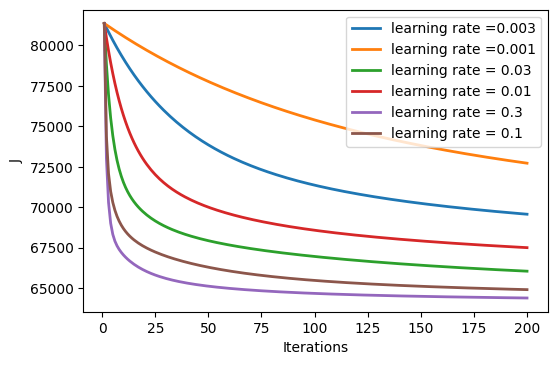

In [ ]:
# fig,axes=plt.subplots(1,1,figsize=(6,4),dpi=100)
# plt.plot(range(1,201),history_003reshape,linewidth=2,label='learning rate =0.003')
# plt.plot(range(1,201),history_001reshape,linewidth=2,label='learning rate =0.001')
# plt.plot(range(1,201),history_03reshape,linewidth=2, label = 'learning rate = 0.03')
# plt.plot(range(1,201),history_reshape,linewidth=2, label = 'learning rate = 0.01')
# plt.plot(range(1,201),history_3reshape,linewidth=2, label = 'learning rate = 0.3')
# plt.plot(range(1,201),history_1reshape,linewidth=2, label = 'learning rate = 0.1')
# plt.xlabel('Iterations')
# plt.ylabel('J')
# plt.legend()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_predict=lin_reg.predict(x_val)
lin_mse=mean_squared_error(lin_predict,y_val)
lin_rmse=sqrt(lin_mse)
lin_rmse

2559.0594065652162

Linear regression RMSE 2559.0594065652162

**Applying 2 degree polynomial**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x_train[:1000000])
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y_train[:1000000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_val_poly=poly_features.transform(x_val)
predict=lin_reg.predict(x_val_poly)
degree2_mse=mean_squared_error(predict,y_val)
degree2_rmse=sqrt(degree2_mse)
degree2_rmse

2486.5616840162443

2nd degree polynomial RMSE 2486.5616840162443

**Using grid search with Ridge regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid=[
            {'alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3]}
]

ridge_reg=Ridge()

grid_search=GridSearchCV(ridge_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(x_train[:1000000],y_train[:1000000])

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'alpha': 3}

Ridge regression alpha=3


**Ridge regression with alpha=3**

In [ ]:
from sklearn.metrics import mean_squared_error

ridge_reg=Ridge(alpha=3,solver='cholesky')
ridge_reg.fit(x_train[:1000000],y_train[:1000000])
ridge_pred=ridge_reg.predict(x_val)
ridge_mse=mean_squared_error(ridge_pred,y_val)
ridge_rmse=np.sqrt(ridge_mse)
ridge_rmse

2496.5487098674917

Ridge regression RMSE 2496.5487098674917

**Lasso regression with alpha= 0.001**

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train[:1000000],y_train[:1000000])
lasso_pred=lasso_reg.predict(x_val)
lasso_mse=mean_squared_error(lasso_pred,y_val)
lasso_rmse=np.sqrt(lasso_mse)
lasso_rmse

Lasso regression RMSE 2496.5489890912604

**Grid search with elastic net**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

param_grid=[
            {'alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3]}
]

elastic_reg=ElasticNet()

grid_search=GridSearchCV(elastic_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(x_train[:1000000],y_train[:1000000])

In [ ]:
grid_search.best_params_

Elastic net alpha=0.001

**Applying elastic net with alpha=0.001**

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_reg=ElasticNet(alpha=0.001)
elastic_reg.fit(x_train[:1000000],y_train[:1000000])
elastic_pred=elastic_reg.predict(x_val)
elastic_mse=mean_squared_error(elastic_pred,y_val)
elastic_rmse=np.sqrt(elastic_mse)
elastic_rmse

Elastic net RMSE= 2496.5731476766564

**Batch gradient descent**

In [ ]:
#bias_column_size = x_train.shape[0] 
bias_column_size = 1000000   

In [ ]:
x_train_b = np.c_ [np.ones((bias_column_size,1)), x_train[:1000000]]# adding the bias column in x_train

**Using normal equation to get theta and then compare with BGD and SGD,MGD**

In [ ]:
theta_best = np.linalg.inv(x_train_b.T .dot (x_train_b)) .dot(x_train_b.T) .dot (y_train[:1000000])
theta_best

In [ ]:
bias_val_column_size = x_val.shape[0]

In [ ]:
x_val_b = np.c_[np.ones((bias_val_column_size,1)),x_val]

**Batch gradient descent**

In [ ]:
eta_BGD=0.3
n_iterations = 20
m= 1000000

theta_BGD = np.random.randn(theta_best.shape[0],1)
for iteration in range(n_iterations):
    gradients_BGD = 2/m * x_train_b.T.dot(x_train_b.dot(theta_BGD) - y_train[:1000000])
    theta_BGD = theta_BGD - eta_BGD * gradients_BGD 

In [ ]:
theta_BGD

**Grid search to get the optimal learning rate**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

param_grid=[
            {'eta0':[0.001,0.003,0.01,0.03,0.1,0.3,1,3]}
]

sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty='l2')

grid_search=GridSearchCV(sgd_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)
grid_search.fit(x_train[:1000000],y_train[:1000000])

In [ ]:
grid_search.best_params_

**Stochastic gradient descent with eta0=0.01**

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn. metrics import mean_squared_error

sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty='l2',eta0=0.01)
sgd_reg.fit(x_train[:1000000],y_train[:1000000])
sgd_pred=sgd_reg.predict(x_val)
sgd_mse=mean_squared_error(sgd_pred,y_val)
sgd_rmse=np.sqrt(sgd_mse)
sgd_rmse

2496.186657833603

Stochastic gradient descent RMSE with eta0=0.01 is 2496.186657833603

**Support Vector Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

param_grid = [
              {'epsilon':[0.003,0.001,0.03,0.01,0.3,0.1,1,3,10,20,50,100,400,800,1000]}
]

svm_reg = LinearSVR()
grid_search = GridSearchCV(svm_reg,param_grid,
                           scoring ='neg_mean_squared_error',
                           return_train_score =True)
grid_search.fit(x_train[:1000000],y_train[:1000000])

In [ ]:
grid_search.best_params_

**from grid search epsilon = 100. LinearSVR with epsilon = 1000**

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from math import sqrt

svm_reg = LinearSVR(epsilon =100)
svm_reg.fit(x_train[:1000000],y_train[:1000000])
svm_reg_pred = svm_reg.predict(x_val)
svm_reg_error = mean_squared_error(svm_reg_pred,y_val)
svm_reg_rmse = sqrt(svm_reg_error)
svm_reg_rmse

2509.112719343564

Linear SVM RMSE = 2509.112719343564

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
              {'epsilon':[10,20,50,100,400,800,1000]},
              {'degree':[2,3,4,5]},
              {'C':[0.003,0.001,0.03,0.01]} #,20,50,100,400,800,1000
]

svm_poly_reg = SVR(kernel = 'poly')

grid_search = GridSearchCV(svm_poly_reg,param_grid,
                           scoring ='neg_mean_squared_error',
                           return_train_score =True)

grid_search.fit(x_train[:1000000],y_train[:1000000])

In [ ]:
grid_search.bet_params_

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics mean_squared_error
from math import sqrt

svm_poly_reg = SVR(kernel ='poly', degree = '', C ='', epislon ='')
svm_poly_reg.fit(x_train[:1000000],y_train[:1000000])
svm_poly_pred = svm_poly_reg.pred(x_val)
svm_poly_mse=mean_squared_error(svm_poy_pred,y_val)
svm_poly_rmse = sqrt(svm_poly_mse)
svm_poy_rmse

**Decision tree**

**The plan was to let decision tree fit however it wanted and let it overfit, make the figure using export_graphviz and then reducing overfitting**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train[:1000000],y_train[:1000000])
tree_pred=tree_reg.predict(x_val)
tree_mse=mean_squared_error(tree_pred,y_val)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

2478.668371845164

Decision tree RMSE = 2478.8828020681417


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg=DecisionTreeRegressor(max_depth =200, max_leaf_nodes=1000)
tree_reg.fit(x_train[:1000000],y_train[:1000000])
tree_pred=tree_reg.predict(x_val)
tree_mse=mean_squared_error(tree_pred,y_val)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

2465.122331183557

Decision tree RMSE = 2465.122

**Ensemble**

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

lin_reg=LinearRegression()
#ridge_reg=Ridge(alpha=3,solver='cholesky')
#lasso_reg=Lasso(alpha=0.001)
#elastic_reg=ElasticNet(alpha=0.001)
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty='l2',eta0=0.01)
#svm_reg = LinearSVR(epsilon =100)
tree_reg=DecisionTreeRegressor(max_depth =200, max_leaf_nodes=1000)

voting_reg=VotingRegressor(
    estimators=[('lr',lin_reg),('sgd_reg',sgd_reg),
                ('tree',tree_reg)]
)

voting_reg.fit(x_train[:1000000],y_train[:1000000])

VotingRegressor(estimators=[('lr',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('sgd_reg',
                             SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, rando...
                                          validation_fraction=0.1, verbose=0,
                                          warm_start=False)),
                            ('tree',
                        

In [ ]:
from sklearn.metrics import mean_squared_error

voting_reg_pred=voting_reg.predict(x_val)
voting_reg_mse=mean_squared_error(voting_reg_pred,y_val)
voting_reg_rmse=np.sqrt(voting_reg_mse)
voting_reg_rmse

2472.3468065578345

Voting regressor RMSE 2481.9209460610778

**BaggingRegressor**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg= BaggingRegressor(
    DecisionTreeRegressor(max_depth =200, max_leaf_nodes=1000),n_estimators =500,
    max_samples=2000, bootstrap =True, n_jobs=-1 
)


In [ ]:
from math import sqrt

bag_reg.fit(x_train[:1000000],y_train[:1000000])
bag_pred= bag_reg.predict(x_val)
bag_mse=mean_squared_error(y_val,bag_pred)
bag_rmse =sqrt(bag_mse)

In [ ]:
bag_rmse

2468.695542210922

**The error is still quite high (2468.695542210922), have to apply grid search to get the optimum numbers of n_estimators,...Moving on to gradient boosting**

**Gardient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2, max_leaf_nodes=1000,n_estimators=500,min_samples_leaf=1000,max_features =9,  random_state=42)
gbrt.fit(x_train[:1000000], y_train[:1000000])

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(x_train[:1000000], y_train[:1000000])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=498,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from math import sqrt

gbrt_best_pred=gbrt_best.predict(x_val)
gbrt_best_mse=mean_squared_error(gbrt_best_pred,y_val)
gbrt_best_rmse = sqrt(gbrt_best_mse)
gbrt_best_rmse

2459.626391781202

gradient boosting RMSE with max_depth=200, max_leaf_nodes=1000,n_estimators=500,random_state=2491.8535321096856///// 2460.9124525611933`

**Making test set predictions**

In [ ]:
gbrt_best_test= gbrt_best.predict(testing_prepared)

**Saving test set predictions**

In [ ]:
chilled_water_preds = pd.DataFrame({'row_id':test_chilled_water['row_id'],
                            'meter_reading':gbrt_best_test})
chilled_water_preds.head()

,row_id,meter_reading
8,8,874.385058
11,11,73.918893
16,16,316.179403
18,18,386.721997
20,20,148.178004


In [ ]:
file_name='chilled_water_preds.csv'
chilled_water_preds.to_csv(file_name,index=False)
print('Saved file:'+file_name)

Saved file:chilled_water_preds.csv
